# Data Science Final Project
## Team 4
### 

### Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as mfm
plt.style.use('seaborn-whitegrid')
hs300 = pd.read_excel('HS300 DATA.XLSX')

We took a look at our data

In [2]:
hs300

,Unnamed: 0,平安银行,Unnamed: 2,Unnamed: 3,Unnamed: 4,万科A,Unnamed: 6,Unnamed: 7,Unnamed: 8,中国宝安,...,人民网,Unnamed: 1190,Unnamed: 1191,Unnamed: 1192,纽威股份,Unnamed: 1194,Unnamed: 1195,Unnamed: 1196,洛阳钼业,Unnamed: 1198
0,NaN,000001.SZ,NaN,NaN,NaN,000002.SZ,NaN,NaN,NaN,000009.SZ,...,603000.SH,NaN,NaN,NaN,603699.SH,NaN,NaN,NaN,603993.SH,NaN
1,日期,开盘价,收盘价,NaN,日期,开盘价,收盘价,NaN,日期,开盘价,...,开盘价,收盘价,NaN,日期,开盘价,收盘价,NaN,日期,开盘价,收盘价
2,Date,open,close,NaN,Date,open,close,NaN,Date,open,...,open,close,NaN,Date,open,close,NaN,Date,open,close
3,2012-06-25 00:00:00,7.5193,7.46372,NaN,2012-06-25 00:00:00,8.24797,8.04568,NaN,2012-06-25 00:00:00,9.54522,...,43.3069,44.1182,NaN,2012-06-25 00:00:00,NaN,NaN,NaN,2012-06-25 00:00:00,NaN,NaN
4,2012-06-26 00:00:00,7.48393,7.52941,NaN,2012-06-26 00:00:00,8.01809,8.22958,NaN,2012-06-26 00:00:00,8.98119,...,44.1281,41.7436,NaN,2012-06-26 00:00:00,NaN,NaN,NaN,2012-06-26 00:00:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,2014-06-19 00:00:00,9.86,9.78,NaN,2014-06-19 00:00:00,8.13,7.99,NaN,2014-06-19 00:00:00,10.21,...,75.1,72.71,NaN,2014-06-19 00:00:00,18.52,18.83,NaN,2014-06-19 00:00:00,6.96,6.74
484,2014-06-20 00:00:00,9.77,9.85,NaN,2014-06-20 00:00:00,8.04,8.13,NaN,2014-06-20 00:00:00,10.21,...,72.85,73.93,NaN,2014-06-20 00:00:00,18.82,19.79,NaN,2014-06-20 00:00:00,6.6,6.58
485,2014-06-23 00:00:00,9.85,9.77,NaN,2014-06-23 00:00:00,8.13,8.15,NaN,2014-06-23 00:00:00,10.21,...,75.18,75.87,NaN,2014-06-23 00:00:00,19.9,19.83,NaN,2014-06-23 00:00:00,6.56,6.8
486,2014-06-24 00:00:00,9.78,9.8,NaN,2014-06-24 00:00:00,8.19,8.09,NaN,2014-06-24 00:00:00,10.21,...,75.47,75.58,NaN,2014-06-24 00:00:00,19.71,19.97,NaN,2014-06-24 00:00:00,6.74,6.77


We get the names of the companies

In [3]:
names = np.array(hs300.iloc[0, :].dropna().index)
print(names[:10])

['平安银行' '万科A' '中国宝安' '南玻A' '招商地产' '深圳能源' '中集集团' '中金岭南' '农产品' '中兴通讯']


Then we create a new MultiIndex for our data

In [4]:
index = pd.MultiIndex.from_product([names, ['open', 'close', 'logarithmic performance Od-Cd']], names = ['company name', 'information'])

We calculate the performance of each day for each company

In [5]:
performance = pd.DataFrame(np.zeros((487, 300)), columns = names)
data_2 = hs300.iloc[3:, :].T.reset_index().drop(['index'], axis = 1).T
for n in range(data_2.shape[1] // 4 + 1):
    data_2[n * 4 + 3] = data_2.iloc[:,n * 4 + 1:n * 4 + 3].apply(lambda x:np.log(x[n * 4 + 2] / x[n * 4 + 1]), axis = 1)
    performance[names[n]] = data_2[n * 4 + 3]
data_2.head()

,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
3,2012-06-25,7.5193,7.46372,-0.007420,2012-06-25,8.24797,8.04568,-0.024832,2012-06-25,9.54522,...,44.1182,0.018561,2012-06-25,NaN,NaN,NaN,2012-06-25,NaN,NaN,NaN
4,2012-06-26,7.48393,7.52941,0.006059,2012-06-26,8.01809,8.22958,0.026034,2012-06-26,8.98119,...,41.7436,-0.055551,2012-06-26,NaN,NaN,NaN,2012-06-26,NaN,NaN,NaN
5,2012-06-27,7.53446,7.5092,-0.003359,2012-06-27,8.1928,8.22958,0.004479,2012-06-27,8.85102,...,40.6256,-0.022635,2012-06-27,NaN,NaN,NaN,2012-06-27,NaN,NaN,NaN
6,2012-06-28,7.5092,7.4435,-0.008787,2012-06-28,8.23877,8.13763,-0.012353,2012-06-28,8.67747,...,40.0319,-0.015451,2012-06-28,NaN,NaN,NaN,2012-06-28,NaN,NaN,NaN
7,2012-06-29,7.46372,7.6608,0.026062,2012-06-29,8.14682,8.1928,0.005627,2012-06-29,8.52996,...,40.5959,0.021930,2012-06-29,NaN,NaN,NaN,2012-06-29,NaN,NaN,NaN


But we still don't know how to acces to a specific company.
So we restructure the information

In [6]:
data_3 = data_2.T.drop_duplicates().rename(index = {0:'dates'})
dates = data_3.T['dates'].reset_index().drop(['index'], axis = 1)['dates']
data_4 = data_3.drop(index = ['dates']).reset_index().drop(['index'], axis = 1)

In [7]:
hs300_cleaned = data_4.set_index(index).T.set_index(dates).iloc[:-1,:]

In [8]:
hs300_cleaned

company name     平安银行                                             万科A  \
information      open    close logarithmic performance Od-Cd     open   
dates                                                                   
2012-06-25     7.5193  7.46372                   -0.00741993  8.24797   
2012-06-26    7.48393  7.52941                    0.00605858  8.01809   
2012-06-27    7.53446   7.5092                   -0.00335909   8.1928   
2012-06-28     7.5092   7.4435                   -0.00878681  8.23877   
2012-06-29    7.46372   7.6608                     0.0260623  8.14682   
...               ...      ...                           ...      ...   
2014-06-18      10.04     9.86                    -0.0180909     8.12   
2014-06-19       9.86     9.78                   -0.00814668     8.13   
2014-06-20       9.77     9.85                    0.00815499     8.04   
2014-06-23       9.85     9.77                   -0.00815499     8.13   
2014-06-24       9.78      9.8                     0.0020429     8.19   

company name                                            中国宝安           \
information     close logarithmic performance Od-Cd     open    close   
dates                                                                   
2012-06-25    8.04568                     -0.024832  9.54522  9.00722   
2012-06-26    8.22958                     0.0260343  8.98119  8.82499   
2012-06-27    8.22958                    0.00447929  8.85102   8.5907   
2012-06-28    8.13763                    -0.0123528  8.67747  8.50392   
2012-06-29     8.1928                    0.00562748  8.52996  8.67747   
...               ...                           ...      ...      ...   
2014-06-18        8.1                   -0.00246609    10.21    10.21   
2014-06-19       7.99                    -0.0173702    10.21    10.21   
2014-06-20       8.13                     0.0111318    10.21    10.21   
2014-06-23       8.15                      0.002457    10.21    10.21   
2014-06-24       8.09                    -0.0122852    10.21    10.21   

company name                                    南玻A  ...  \
information  logarithmic performance Od-Cd     open  ...   
dates                                                ...   
2012-06-25                      -0.0580144  8.73486  ...   
2012-06-26                      -0.0175443  8.50748  ...   
2012-06-27                       -0.029853  8.62117  ...   
2012-06-28                      -0.0202027  8.46959  ...   
2012-06-29                       0.0171462  8.34643  ...   
...                                    ...      ...  ...   
2014-06-18                               0     7.02  ...   
2014-06-19                               0     7.03  ...   
2014-06-20                               0     6.67  ...   
2014-06-23                               0     6.73  ...   
2014-06-24                               0     6.74  ...   

company name                          中信银行      人民网           \
information  logarithmic performance Od-Cd     open    close   
dates                                                          
2012-06-25                     -0.00750942  43.3069  44.1182   
2012-06-26                               0  44.1281  41.7436   
2012-06-27                     -0.00502514  41.5556  40.6256   
2012-06-28                      -0.0101011  40.6552  40.0319   
2012-06-29                       0.0176549  39.7153  40.5959   
...                                    ...      ...      ...   
2014-06-18                      -0.0138251    77.11     75.3   
2014-06-19                       -0.016413     75.1    72.71   
2014-06-20                      0.00703403    72.85    73.93   
2014-06-23                     -0.00703403    75.18    75.87   
2014-06-24                               0    75.47    75.58   

company name                                 纽威股份         \
information  logarithmic performance Od-Cd   open  close   
dates                                                      
2012-06-25                        0.

In [9]:
performance = performance.drop([0, 1, 2]).set_index(hs300_cleaned[names[0]]['open'].index)

In [10]:
profits = pd.DataFrame(np.zeros((483, 300)), columns = names)
for name in names:
    temp_op = hs300_cleaned[name]['open'].iloc[1:].reset_index().drop(['dates'], axis = 1)['open']
    temp_cl = hs300_cleaned[name]['close'].iloc[0:-1].reset_index().drop(['dates'], axis = 1)['close']
    temp_col = pd.concat([temp_op/temp_op, -1 * temp_cl/temp_op], axis = 1)
    prof = pd.DataFrame(temp_col.sum(axis = 1)).rename(columns = {0:'profit'})
    profits[name] = prof

In [11]:
profits = profits.set_index(hs300_cleaned[names[0]]['open'].iloc[1:].index)

In [12]:
print('shape of hs300_cleanded = {}'.format(hs300_cleaned.shape))
print('shape of performance = {}'.format(performance.shape))
print('shape of profit = {}'.format(profits.shape))

shape of hs300_cleanded = (484, 900)
shape of performance = (484, 300)
shape of profit = (483, 300)


In [13]:
### cleaned data with open price, close price and performance
hs300_cleaned

company name     平安银行                                             万科A  \
information      open    close logarithmic performance Od-Cd     open   
dates                                                                   
2012-06-25     7.5193  7.46372                   -0.00741993  8.24797   
2012-06-26    7.48393  7.52941                    0.00605858  8.01809   
2012-06-27    7.53446   7.5092                   -0.00335909   8.1928   
2012-06-28     7.5092   7.4435                   -0.00878681  8.23877   
2012-06-29    7.46372   7.6608                     0.0260623  8.14682   
...               ...      ...                           ...      ...   
2014-06-18      10.04     9.86                    -0.0180909     8.12   
2014-06-19       9.86     9.78                   -0.00814668     8.13   
2014-06-20       9.77     9.85                    0.00815499     8.04   
2014-06-23       9.85     9.77                   -0.00815499     8.13   
2014-06-24       9.78      9.8                     0.0020429     8.19   

company name                                            中国宝安           \
information     close logarithmic performance Od-Cd     open    close   
dates                                                                   
2012-06-25    8.04568                     -0.024832  9.54522  9.00722   
2012-06-26    8.22958                     0.0260343  8.98119  8.82499   
2012-06-27    8.22958                    0.00447929  8.85102   8.5907   
2012-06-28    8.13763                    -0.0123528  8.67747  8.50392   
2012-06-29     8.1928                    0.00562748  8.52996  8.67747   
...               ...                           ...      ...      ...   
2014-06-18        8.1                   -0.00246609    10.21    10.21   
2014-06-19       7.99                    -0.0173702    10.21    10.21   
2014-06-20       8.13                     0.0111318    10.21    10.21   
2014-06-23       8.15                      0.002457    10.21    10.21   
2014-06-24       8.09                    -0.0122852    10.21    10.21   

company name                                    南玻A  ...  \
information  logarithmic performance Od-Cd     open  ...   
dates                                                ...   
2012-06-25                      -0.0580144  8.73486  ...   
2012-06-26                      -0.0175443  8.50748  ...   
2012-06-27                       -0.029853  8.62117  ...   
2012-06-28                      -0.0202027  8.46959  ...   
2012-06-29                       0.0171462  8.34643  ...   
...                                    ...      ...  ...   
2014-06-18                               0     7.02  ...   
2014-06-19                               0     7.03  ...   
2014-06-20                               0     6.67  ...   
2014-06-23                               0     6.73  ...   
2014-06-24                               0     6.74  ...   

company name                          中信银行      人民网           \
information  logarithmic performance Od-Cd     open    close   
dates                                                          
2012-06-25                     -0.00750942  43.3069  44.1182   
2012-06-26                               0  44.1281  41.7436   
2012-06-27                     -0.00502514  41.5556  40.6256   
2012-06-28                      -0.0101011  40.6552  40.0319   
2012-06-29                       0.0176549  39.7153  40.5959   
...                                    ...      ...      ...   
2014-06-18                      -0.0138251    77.11     75.3   
2014-06-19                       -0.016413     75.1    72.71   
2014-06-20                      0.00703403    72.85    73.93   
2014-06-23                     -0.00703403    75.18    75.87   
2014-06-24                               0    75.47    75.58   

company name                                 纽威股份         \
information  logarithmic performance Od-Cd   open  close   
dates                                                      
2012-06-25                        0.

In [14]:
### cleaned data with the performance
performance

,平安银行,万科A,中国宝安,南玻A,招商地产,深圳能源,中集集团,中金岭南,农产品,中兴通讯,...,建设银行,金钼股份,中国银行,中国重工,大唐发电,金隅股份,中信银行,人民网,纽威股份,洛阳钼业
dates,,,,,,,,,,,,,,,,,,,,,
2012-06-25,-0.007420,-0.024832,-0.058014,-0.023040,-0.056874,0.007294,-0.050606,-0.033711,-0.016129,-0.034017,...,-0.007084,-0.041203,0.000000,-0.003802,0.008658,-0.081033,-0.007509,0.018561,NaN,NaN
2012-06-26,0.006059,0.026034,-0.017544,0.017661,0.060650,-0.005857,-0.014599,0.002283,0.009804,0.013090,...,-0.002372,0.011111,0.003540,0.000000,-0.026202,-0.017417,0.000000,-0.055551,NaN,NaN
2012-06-27,-0.003359,0.004479,-0.029853,-0.013275,0.029047,-0.010394,0.018349,-0.004577,-0.013072,-0.010327,...,0.000000,-0.008720,0.000000,0.007648,0.010638,-0.016237,-0.005025,-0.022635,NaN,NaN
2012-06-28,-0.008787,-0.012353,-0.020203,-0.011249,-0.016261,-0.016529,-0.010622,-0.026454,-0.036917,-0.011769,...,-0.009547,-0.016713,-0.003552,-0.009569,0.010638,-0.021022,-0.010101,-0.015451,NaN,NaN
2012-06-29,0.026062,0.005627,0.017146,0.021337,0.010656,-0.018377,0.021277,0.002323,-0.008584,-0.028250,...,0.007168,0.019124,0.003552,0.003861,-0.007080,0.018210,0.017655,0.021930,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-06-18,-0.018091,-0.002466,0.000000,-0.001426,0.002832,-0.005401,-0.031623,0.019384,-0.010638,-0.006847,...,-0.002413,0.094237,-0.007220,-0.004435,0.005571,0.000000,-0.013825,-0.023753,-0.009698,0.090622
2014-06-19,-0.008147,-0.017370,0.000000,-0.052567,-0.024787,-0.018215,-0.008839,-0.028472,-0.024907,-0.026338,...,-0.007273,-0.045059,-0.014599,-0.024748,-0.013986,-0.022748,-0.016413,-0.032342,0.016600,-0.032120
2014-06-20,0.008155,0.011132,0.000000,0.008955,-0.003872,-0.001843,0.019324,0.033366,0.014154,0.000783,...,0.007273,-0.007047,0.010969,0.004545,0.000000,-0.001778,0.007034,0.014716,0.050257,-0.003035


In [15]:
### cleaned data with the profits
#since the profit is Next's day open - Current Day's close, the profit is done the next day, that's why it starts at 
dates_index = profits.index
profits

,平安银行,万科A,中国宝安,南玻A,招商地产,深圳能源,中集集团,中金岭南,农产品,中兴通讯,...,建设银行,金钼股份,中国银行,中国重工,大唐发电,金隅股份,中信银行,人民网,纽威股份,洛阳钼业
dates,,,,,,,,,,,,,,,,,,,,,
2012-06-26,0.002701,-0.003440,-0.002899,-0.003341,-0.016500,-0.004380,0.000763,0.000000e+00,-0.009852,-0.002080,...,0.000000,-0.005587,-0.003546,-0.005747,0.000000,-0.005755,0.002506,0.000224,0.000000,0.000000
2012-06-27,0.000671,-0.004489,0.002941,-0.004396,-0.015774,-0.005908,0.003086,-1.141553e-03,0.001623,-0.000685,...,0.000000,0.000000,-0.003546,-0.001919,-0.007130,0.000000,0.000000,-0.004524,0.000000,0.000000
2012-06-28,0.000000,0.001116,0.010000,-0.004474,0.000000,0.001490,0.003774,1.021566e-02,-0.001647,0.005506,...,0.000000,0.008682,0.000000,0.000000,-0.010695,0.001486,0.002513,0.000730,0.000000,0.000000
2012-06-29,0.002708,0.001129,0.003052,-0.003405,-0.005356,-0.001517,-0.006912,2.325581e-03,0.000000,0.000000,...,0.000000,-0.002414,0.000000,-0.005803,0.000000,-0.009188,-0.002545,-0.007972,0.000000,0.000000
2012-07-02,0.004596,0.003356,0.010880,0.007718,0.010887,0.004615,0.011152,1.934016e-02,0.010239,0.007818,...,0.002375,0.011700,0.000000,0.001923,0.000000,0.005979,0.000000,0.018890,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-06-18,0.000000,0.000000,0.000000,-0.001425,-0.000945,0.001795,0.003891,0.000000e+00,-0.001058,-0.002274,...,0.000000,0.001475,0.000000,-0.002212,0.002793,0.000000,-0.002288,-0.002723,-0.003217,0.004823
2014-06-19,0.000000,0.003690,0.000000,0.002845,0.000942,0.000000,0.004000,1.838629e-08,0.000000,-0.001529,...,0.000000,0.005340,0.000000,0.000000,0.000000,0.000000,-0.002326,-0.002663,0.002700,0.021552
2014-06-20,-0.001024,0.006219,0.000000,0.000000,-0.000966,-0.001842,-0.007317,1.071429e-02,0.000000,0.002349,...,0.000000,-0.005618,0.000000,0.000000,0.000000,-0.003552,0.004706,0.001922,-0.000531,-0.021212


In [16]:
font_path = "MicrosoftYaHei-01.ttf"
prop = mfm.FontProperties(fname=font_path)

C:\Users\caflo\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


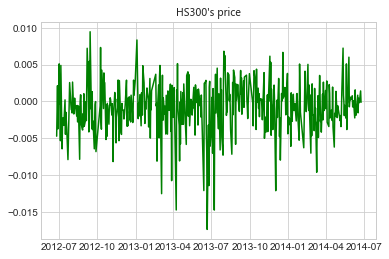

In [17]:
plt.plot(profits.mean(axis = 1), color = 'green')
plt.title("HS300's price", fontproperties=prop)
plt.show()

In [18]:
best_seasonSS = profits.mean(axis = 1).diff().sort_values().iloc[:483//10].reset_index()
best_seasonSS['day'] = pd.DatetimeIndex(best_seasonSS['dates']).day
best_seasonSS['month'] = pd.DatetimeIndex(best_seasonSS['dates']).month
best_seasonSS['year'] = pd.DatetimeIndex(best_seasonSS['dates']).year

In [19]:
months = best_seasonSS['month']
for i in range(months.shape[0]):
    if months.iloc[i] == 1:
        months.iloc[i] = 'January'
    if months.iloc[i] == 2:
        months.iloc[i] = 'February'
    if months.iloc[i] == 3:
        months.iloc[i] = 'March'
    if months.iloc[i] == 4:
        months.iloc[i] = 'April'
    if months.iloc[i] == 5:
        months.iloc[i] = 'May'
    if months.iloc[i] == 6:
        months.iloc[i] = 'June'
    if months.iloc[i] == 7:
        months.iloc[i] = 'July'
    if months.iloc[i] == 8:
        months.iloc[i] = 'August'
    if months.iloc[i] == 9:
        months.iloc[i] = 'September'
    if months.iloc[i] == 10:
        months.iloc[i] = 'October'
    if months.iloc[i] == 11:
        months.iloc[i] = 'November'
    if months.iloc[i] == 12:
        months.iloc[i] = 'December'
months_SS = months.value_counts()

C:\Users\caflo\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


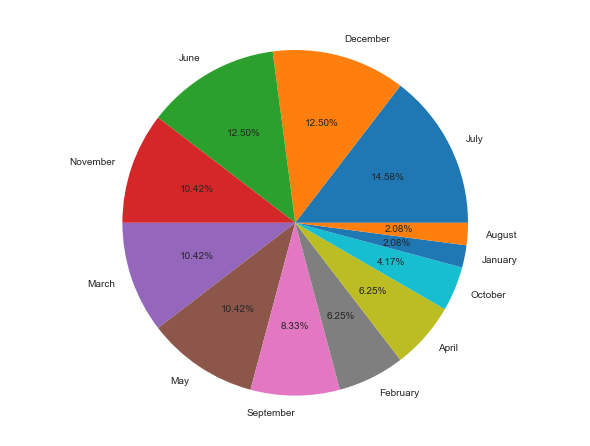

,Days per Month
July,7
December,6
June,6
November,5
March,5
May,5
September,4
February,3
April,3
October,2


In [20]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(months_SS, labels = best_seasonSS['month'].value_counts().index, autopct='%1.2f%%')
plt.show()
pd.DataFrame(months_SS).rename(columns = {'month':'Days per Month'})

In [21]:
best_seasonVI = profits.mean(axis = 1).diff().sort_values(ascending = False).iloc[:483//10].reset_index()
best_seasonVI['day'] = pd.DatetimeIndex(best_seasonVI['dates']).day
best_seasonVI['month'] = pd.DatetimeIndex(best_seasonVI['dates']).month
best_seasonVI['year'] = pd.DatetimeIndex(best_seasonVI['dates']).year

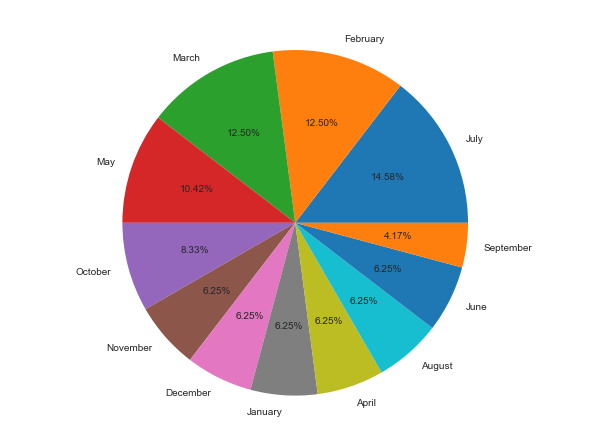

,Days per Month
July,7
February,6
March,6
May,5
October,4
November,3
December,3
January,3
April,3
August,3


In [22]:
months = best_seasonVI['month']
for i in range(months.shape[0]):
    if months.iloc[i] == 1:
        months.iloc[i] = 'January'
    if months.iloc[i] == 2:
        months.iloc[i] = 'February'
    if months.iloc[i] == 3:
        months.iloc[i] = 'March'
    if months.iloc[i] == 4:
        months.iloc[i] = 'April'
    if months.iloc[i] == 5:
        months.iloc[i] = 'May'
    if months.iloc[i] == 6:
        months.iloc[i] = 'June'
    if months.iloc[i] == 7:
        months.iloc[i] = 'July'
    if months.iloc[i] == 8:
        months.iloc[i] = 'August'
    if months.iloc[i] == 9:
        months.iloc[i] = 'September'
    if months.iloc[i] == 10:
        months.iloc[i] = 'October'
    if months.iloc[i] == 11:
        months.iloc[i] = 'November'
    if months.iloc[i] == 12:
        months.iloc[i] = 'December'
months_VI = months.value_counts()
fig = plt.figure(figsize = (8, 6))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(months_VI, labels = best_seasonVI['month'].value_counts().index, autopct='%1.2f%%')
plt.show()
pd.DataFrame(months_VI).rename(columns = {'month':'Days per Month'})

In [23]:
d_number = 259

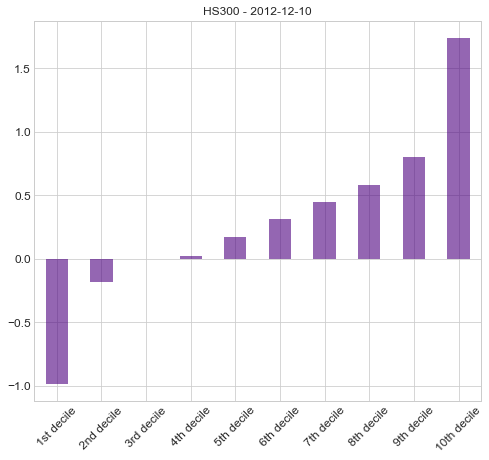

<Figure size 1440x720 with 0 Axes>

,performance,profit
1st decile,-0.004480,-0.985465
2nd decile,0.003995,-0.182628
3rd decile,0.009819,-0.001625
4th decile,0.013581,0.017880
5th decile,0.016784,0.173651
6th decile,0.020922,0.309390
7th decile,0.024889,0.444241
8th decile,0.029329,0.580192
9th decile,0.035691,0.796888
10th decile,0.050001,1.736675


In [24]:
d_number = np.random.randint(483)
columns = ['1st decile','2nd decile',
           '3rd decile','4th decile',
           '5th decile','6th decile',
           '7th decile','8th decile',
           '9th decile','10th decile']

dateper = performance.iloc[d_number, :].sort_values()
dateprof = pd.DataFrame(profits.iloc[d_number, :].sort_values()).set_index(dateper.index)
perf = []
prof = []
for decile in range(10):
    best_prof = dateprof.iloc[decile * (300//10):(decile + 1) * (300//10)]
    best_perf = dateper.iloc[decile * (300//10):(decile + 1) * (300//10)]
    perf.append(best_perf.mean())
    prof.append(best_prof.mean()[0] * 100)
today = pd.DataFrame([perf, prof], columns = columns, index = ['performance', 'profit'])
today = today.T
today['profit'].plot.bar(rot=45, color = [(0.3,0.0,0.5,0.6)], figsize = (8, 7), fontsize = 12)
plt.title('HS300 - {}'.format(best_prof.mean().index[0].date()))
plt.figure(figsize=(20,10))
plt.show()
today

In [25]:
best_prof.mean().index[0].date()

datetime.date(2012, 12, 10)

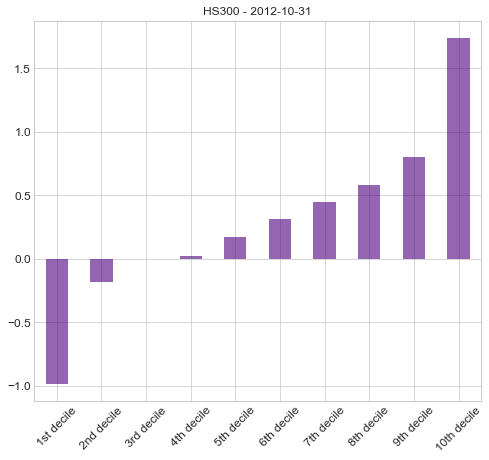

<Figure size 1440x720 with 0 Axes>

,performance,profit
1st decile,-0.004480,-0.985465
2nd decile,0.003995,-0.182628
3rd decile,0.009819,-0.001625
4th decile,0.013581,0.017880
5th decile,0.016784,0.173651
6th decile,0.020922,0.309390
7th decile,0.024889,0.444241
8th decile,0.029329,0.580192
9th decile,0.035691,0.796888
10th decile,0.050001,1.736675


In [26]:
today['profit'].plot.bar(rot=45, color = [(0.3,0.0,0.5,0.6)], figsize = (8, 7), fontsize = 12)
plt.title('HS300 - 2012-10-31')
plt.figure(figsize=(20,10))
plt.show()
today

In [27]:
df_sp600 = pd.DataFrame({"proft": [0.39, 0.13, 0.07, 0.02, -0.01, -0.04, -0.07, -0.12, -0.17, -0.43]}, index = ['1st decile','2nd decile',
           '3rd decile','4th decile',
           '5th decile','6th decile',
           '7th decile','8th decile',
           '9th decile','10th decile'])

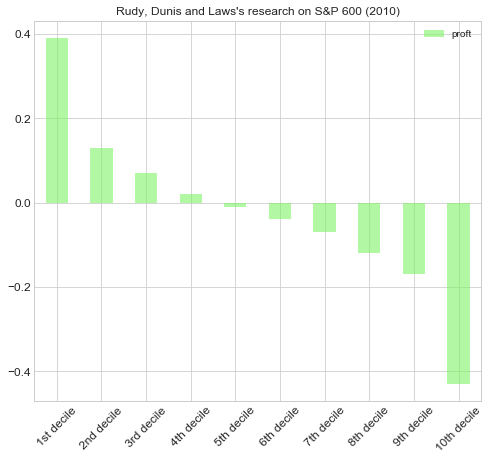

<Figure size 1440x720 with 0 Axes>

,proft
1st decile,0.39
2nd decile,0.13
3rd decile,0.07
4th decile,0.02
5th decile,-0.01
6th decile,-0.04
7th decile,-0.07
8th decile,-0.12
9th decile,-0.17
10th decile,-0.43


In [28]:
df_sp600.plot.bar(rot=45, color = [(0.5,0.95,0.4,0.6), (0.3,0.9,0.4,0.6)], figsize = (8, 7), fontsize = 12)
plt.title("Rudy, Dunis and Laws's research on S&P 600 (2010)")
plt.figure(figsize=(20,10))
plt.show()
df_sp600

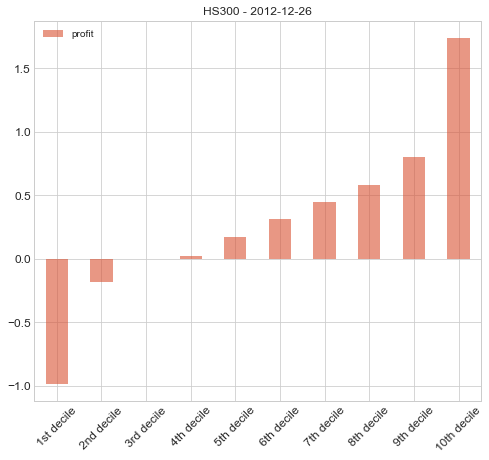

<Figure size 1440x720 with 0 Axes>

1st decile    -0.985465
2nd decile    -0.182628
3rd decile    -0.001625
4th decile     0.017880
5th decile     0.173651
6th decile     0.309390
7th decile     0.444241
8th decile     0.580192
9th decile     0.796888
10th decile    1.736675
Name: profit, dtype: float64

In [29]:
pd.DataFrame(today['profit']).plot.bar(rot=45, color = [(0.85,0.32,0.2,0.6), (0.3,0.9,0.4,0.6)], figsize = (8, 7), fontsize = 12)
plt.title('HS300 - 2012-12-26')
plt.figure(figsize=(20,10))
plt.show()
today['profit']

In [37]:
columns = ['1st decile','2nd decile',
           '3rd decile','4th decile',
           '5th decile','6th decile',
           '7th decile','8th decile',
           '9th decile','10th decile']

best_profits_oneday = []
worst_profits_oneday = []
best_Value_Investing = []
best_Short_Selling = []
for d_number in range(483):
    dateper = performance.iloc[d_number, :].sort_values()
    dateprof = pd.DataFrame(profits.iloc[d_number, :].sort_values()).set_index(dateper.index)
    perf = []
    prof = []
    for decile in range(10):
        best_prof = dateprof.iloc[decile * (300//10):(decile + 1) * (300//10)]
        best_perf = dateper.iloc[decile * (300//10):(decile + 1) * (300//10)]
        perf.append(best_perf.mean())
        prof.append(best_prof.mean()[0] * 100)
        if decile == 0:
            best_Short_Selling.append(list(best_prof.index))
        if decile == 9:
            best_Value_Investing.append(list(best_prof.index))
    best_profits_oneday.append(max(prof))
    worst_profits_oneday.append(min(prof))
today = pd.DataFrame([perf, prof], columns = columns, index = ['performance', 'profit'])
today = today.T

In [38]:
pd.Series(best_profits_oneday).mean()

1.1718096379797918

In [39]:
pd.Series(worst_profits_oneday).mean()

-1.2265166438222488

In [33]:
best_comapnies_Value_Investing = pd.DataFrame(best_Short_Selling).unstack().value_counts()[:4].index
best_comapnies_Short_Selling = pd.DataFrame(best_Value_Investing).unstack().value_counts()[:4].index
best_comapnies_Value_Investing

Index(['荣盛发展', '亚厦股份', '威孚高科', '科大讯飞'], dtype='object')

In [34]:
best_comapnies_Short_Selling

Index(['纽威股份', '陕西煤业', '浙能电力', '美的集团'], dtype='object')

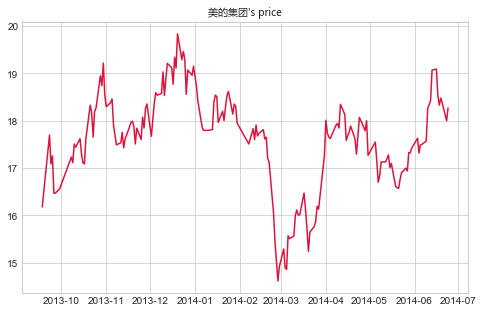

In [35]:
name = best_comapnies_Short_Selling[3]
plt.figure(figsize=(8,5))
plt.plot(hs300_cleaned[name]['close'], color = 'crimson')
plt.title("{}'s price".format(name), fontproperties=prop)
plt.show()

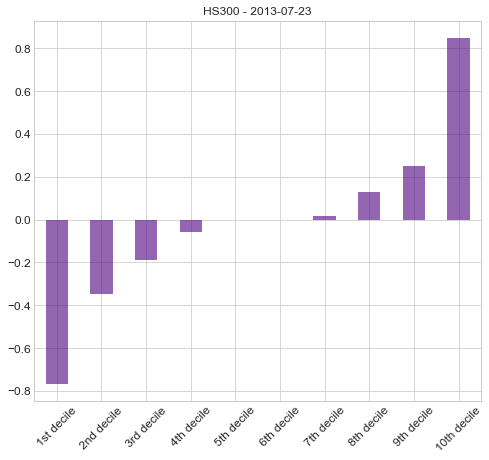

<Figure size 1440x720 with 0 Axes>

,performance,profit
1st decile,-0.016468,-0.767285
2nd decile,-0.008663,-0.346199
3rd decile,-0.005778,-0.187831
4th decile,-0.003277,-0.057888
5th decile,-0.000933,0.000000
6th decile,0.000490,0.000000
7th decile,0.003336,0.017470
8th decile,0.007106,0.128225
9th decile,0.012106,0.251766
10th decile,0.032630,0.847593


In [36]:
today['profit'].plot.bar(rot=45, color = [(0.3,0.0,0.5,0.6)], figsize = (8, 7), fontsize = 12)
plt.title('HS300 - 2013-07-23')
plt.figure(figsize=(20,10))
plt.show()
today